### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [28]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve
import matplotlib.pyplot as plt

Cargamos los datos de iris y preprocesamos los datos

In [17]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [19]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [20]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test]))
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.1
epoch   0 - Loss 0.00557, Accuracy 0.45833
epoch  10 - Loss 0.00021, Accuracy 0.62500
epoch  20 - Loss 0.00030, Accuracy 0.70833
epoch  30 - Loss 0.00031, Accuracy 0.75000
epoch  40 - Loss 0.00020, Accuracy 0.75000
epoch  50 - Loss 0.00012, Accuracy 0.79167
epoch  60 - Loss 0.00005, Accuracy 0.87500
epoch  70 - Loss 0.00003, Accuracy 0.95833
epoch  80 - Loss 0.00002, Accuracy 0.95833
epoch  90 - Loss 0.00002, Accuracy 0.95833
epoch 100 - Loss 0.00002, Accuracy 1.00000
epoch 110 - Loss 0.00002, Accuracy 1.00000
epoch 120 - Loss 0.00001, Accuracy 1.00000
epoch 130 - Loss 0.00001, Accuracy 1.00000
epoch 140 - Loss 0.00001, Accuracy 1.00000
epoch 150 - Loss 0.00001, Accuracy 1.00000
epoch 160 - Loss 0.00002, Accuracy 1.00000
epoch 170 - Loss 0.00002, Accuracy 1.00000
epoch 180 - Loss 0.00002, Accuracy 1.00000
epoch 190 - Loss 0.00001, Accuracy 1.00000
epoch 200 - Loss 0.00001, Accuracy 1.00000
epoch 210 - Loss 0.00001, Accuracy 1.00000
epoch 220 - Loss 0.0000

El accuracy después del entrenamiento es el siguiente:

In [21]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.9333333333333333


Después de calcular las predicciones, podemos visualizar la matriz de confusión:

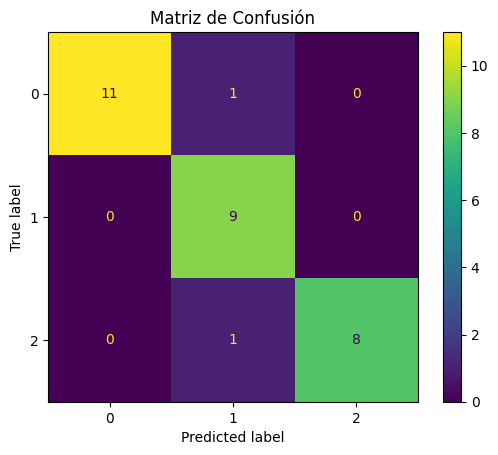

In [22]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Ahora realizaremos la misma prueba pero añadiendo más capas y cambiando la función de activación:

In [23]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(4, 20, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(20, 10, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(10, 6, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [24]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
(acc2, loss2) = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.13333333333333333
epoch   0 - Loss 0.71351, Accuracy 0.20833
epoch  10 - Loss 0.00020, Accuracy 0.91667
epoch  20 - Loss 0.00006, Accuracy 0.91667
epoch  30 - Loss 0.00002, Accuracy 0.91667
epoch  40 - Loss 0.00001, Accuracy 0.95833
epoch  50 - Loss 0.00002, Accuracy 1.00000
epoch  60 - Loss 0.00001, Accuracy 1.00000
epoch  70 - Loss 0.00001, Accuracy 1.00000
epoch  80 - Loss 0.00001, Accuracy 1.00000
epoch  90 - Loss 0.00000, Accuracy 1.00000
epoch 100 - Loss 0.00000, Accuracy 1.00000
epoch 110 - Loss 0.00000, Accuracy 1.00000
epoch 120 - Loss 0.00000, Accuracy 1.00000
epoch 130 - Loss 0.00000, Accuracy 1.00000
epoch 140 - Loss 0.00000, Accuracy 1.00000
epoch 150 - Loss 0.00000, Accuracy 1.00000
epoch 160 - Loss 0.00000, Accuracy 1.00000
epoch 170 - Loss 0.00000, Accuracy 1.00000
epoch 180 - Loss 0.00000, Accuracy 1.00000
epoch 190 - Loss 0.00000, Accuracy 1.00000
epoch 200 - Loss 0.00000, Accuracy 1.00000
epoch 210 - Loss 0.00000, Accuracy 1.00000
epoch 2

In [25]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9666666666666667


En este segundo modelo la precisión sigue siendo alta, para poder verlo mejor dibujaremos la matriz de confusión:

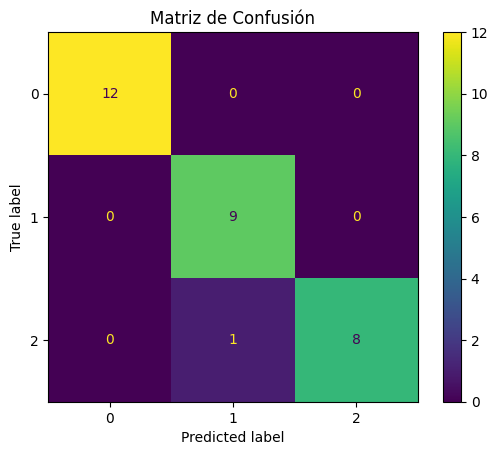

In [26]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=0.93$$

$$ \text{Accuracy}_{2domodelo}=0.96$$


Por lo que podemos llegar a la conclusión de que la neurona funciona bien aún poniendo más capas o cambiando las funciones de activación, aunque el primer modelo sigue siendo mejor al tener menos capas ocultas, si hacemos más pruebas podemos comprobarlo

Para finalizar con este test, graficaremos la precisión y la pérdida a lo largo de las épocas:

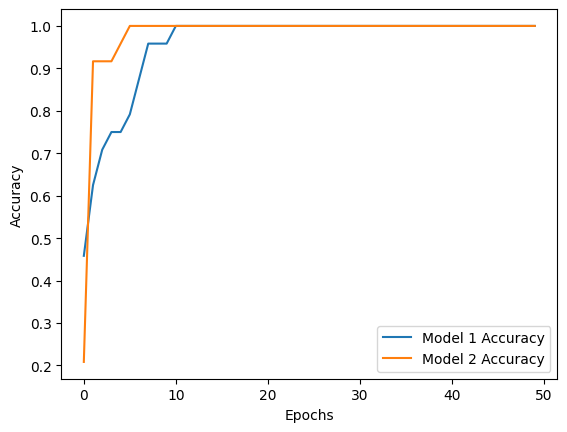

In [29]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

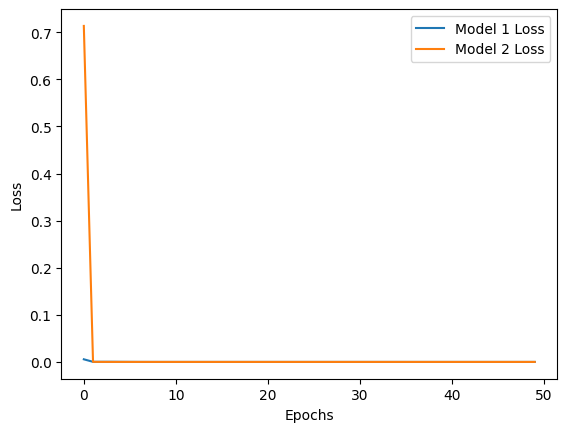

In [30]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Test de entrenamiento del conjunto de datos DIGITS

Cargamos y preprocesamos los datos del conjunto de datos DIGITS

In [31]:
from data.load_data import load_digits_data
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y entrenamos

In [33]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [34]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.06944444444444445
epoch   0 - Loss 3.39363, Accuracy 0.35417
epoch  10 - Loss 0.29071, Accuracy 0.75694
epoch  20 - Loss 0.23640, Accuracy 0.79514
epoch  30 - Loss 0.16643, Accuracy 0.82292
epoch  40 - Loss 0.12814, Accuracy 0.83333
epoch  50 - Loss 0.09301, Accuracy 0.84375
epoch  60 - Loss 0.06535, Accuracy 0.84722
epoch  70 - Loss 0.04341, Accuracy 0.84375
epoch  80 - Loss 0.03376, Accuracy 0.85069
epoch  90 - Loss 0.02719, Accuracy 0.85069
epoch 100 - Loss 0.02437, Accuracy 0.85764
epoch 110 - Loss 0.02434, Accuracy 0.87153
epoch 120 - Loss 0.02348, Accuracy 0.86806
epoch 130 - Loss 0.02251, Accuracy 0.87500
epoch 140 - Loss 0.02181, Accuracy 0.86806
epoch 150 - Loss 0.02139, Accuracy 0.86806
epoch 160 - Loss 0.01977, Accuracy 0.85764
epoch 170 - Loss 0.01986, Accuracy 0.85417
epoch 180 - Loss 0.02058, Accuracy 0.85417
epoch 190 - Loss 0.02109, Accuracy 0.85417
epoch 200 - Loss 0.02131, Accuracy 0.85417
epoch 210 - Loss 0.02190, Accuracy 0.85764
epoch 2

El accuracy final después de entrenar es el siguiente:

In [35]:
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy after training:  0.8638888888888889


Como podemos observar, con este dataset el modelo entrena bien, obteniendo un accuracy del *81%*

Ahora visualizaremos en una matriz de confusión el rendimiento del modelo:

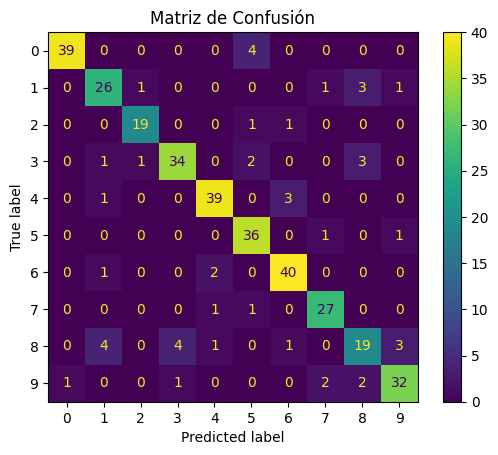

In [36]:
Y_pred = [nn.feedforward(x) for x in X_test]
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Ahora vamos a probar añadiendo más capas y cambiando las funciones de activación

In [37]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [38]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
(acc2, loss2) = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.05277777777777778
epoch   0 - Loss 1.85591, Accuracy 0.21181
epoch  10 - Loss 0.66776, Accuracy 0.73611
epoch  20 - Loss 0.23691, Accuracy 0.83681
epoch  30 - Loss 0.10831, Accuracy 0.88194
epoch  40 - Loss 0.07329, Accuracy 0.90278
epoch  50 - Loss 0.05630, Accuracy 0.90625
epoch  60 - Loss 0.04703, Accuracy 0.89931
epoch  70 - Loss 0.03867, Accuracy 0.89583
epoch  80 - Loss 0.03200, Accuracy 0.89931
epoch  90 - Loss 0.02777, Accuracy 0.89583
epoch 100 - Loss 0.02460, Accuracy 0.89236
epoch 110 - Loss 0.02262, Accuracy 0.89236
epoch 120 - Loss 0.02117, Accuracy 0.89236
epoch 130 - Loss 0.01990, Accuracy 0.88889
epoch 140 - Loss 0.01876, Accuracy 0.89583
epoch 150 - Loss 0.01775, Accuracy 0.88889
epoch 160 - Loss 0.01683, Accuracy 0.88889
epoch 170 - Loss 0.01599, Accuracy 0.88889
epoch 180 - Loss 0.01523, Accuracy 0.89236
epoch 190 - Loss 0.01455, Accuracy 0.89583
epoch 200 - Loss 0.01393, Accuracy 0.89583
epoch 210 - Loss 0.01335, Accuracy 0.89583
epoch 2

In [39]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9194444444444444


Visualización de la matriz de confusión para este segundo modelo:

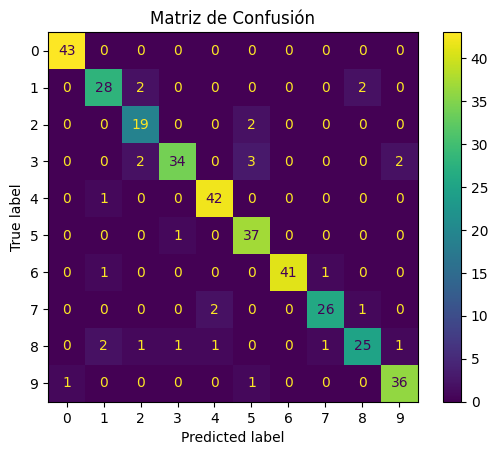

In [40]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero:

$$ \text{Accuracy}_{1ermodelo}=0.86$$

$$ \text{Accuracy}_{2domodelo}=0.91$$

Esto es debido probablemente al uso de otra función de activación.

Ahora para poder observar mejor que tan bien funcionó el segundo modelo dibujando la curva de roc

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Y_pred1 = [np.argmax(nn.feedforward(x)) for x in X_test]  # Modelo 1
Y_pred2 = [np.argmax(nn2.feedforward(x)) for x in X_test]  # Modelo 2

y_test_labels = np.argmax(y_test, axis=1)  # Convertir a etiquetas de clase


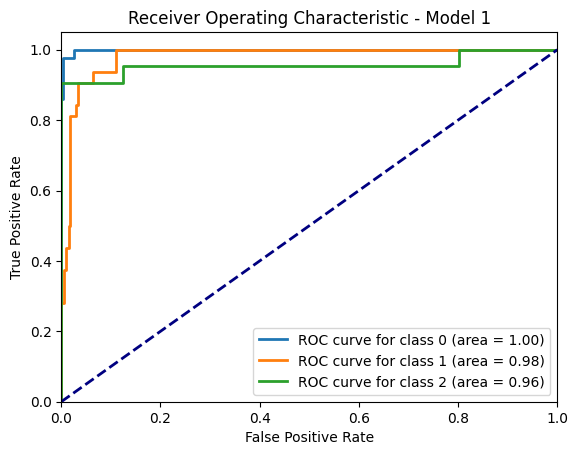

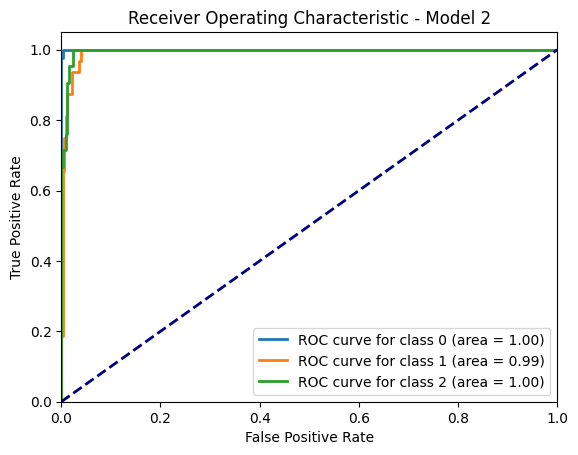

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test_labels, classes=[0, 1, 2])  # Ajusta según el número de clases
n_classes = y_test_bin.shape[1]

y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score1[:, i])  # Calcula la curva ROC
    roc_auc = auc(fpr, tpr)  # Calcula el AUC
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Model 1')
plt.legend(loc="lower right")
plt.show()

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score2[:, i])  # Calcula la curva ROC
    roc_auc = auc(fpr, tpr)  # Calcula el AUC
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Model 2')
plt.legend(loc="lower right")
plt.show()
